In [1]:
import pandas as pd

file_path = 'FWI_Dataset.csv'
df = pd.read_csv(file_path)

print(df.head())
print(df.info())
print(df.describe())

   day  month  year  Temperature   RH   Ws  Rain   FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29   57   18    0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29   61   13    1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26   82   22   13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25   89   13    2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27   77   16    0.0  64.8  3.0  14.2  1.2  3.9   

   FWI    Classes    Region  
0  0.5  not fire     Bejaia  
1  0.4  not fire     Bejaia  
2  0.1  not fire     Bejaia  
3    0  not fire     Bejaia  
4  0.5  not fire     Bejaia  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 no

day                  0
month                0
year                 0
Temperature          0
Relative Humidity    0
Wind Speed           0
Rain                 0
FFMC                 0
DMC                  0
DC                   0
ISI                  0
BUI                  0
FWI                  0
Classes              1
Region_encoded       0
dtype: int64
day                  0
month                0
year                 0
Temperature          0
Relative Humidity    0
Wind Speed           0
Rain                 0
FFMC                 0
DMC                  0
DC                   0
ISI                  0
BUI                  0
FWI                  0
Classes              1
Region_encoded       0
dtype: int64


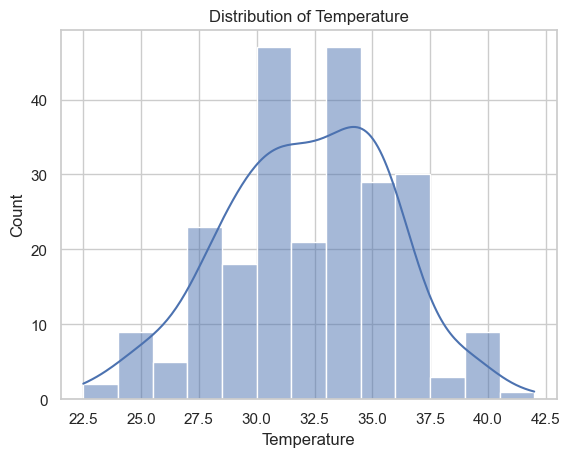

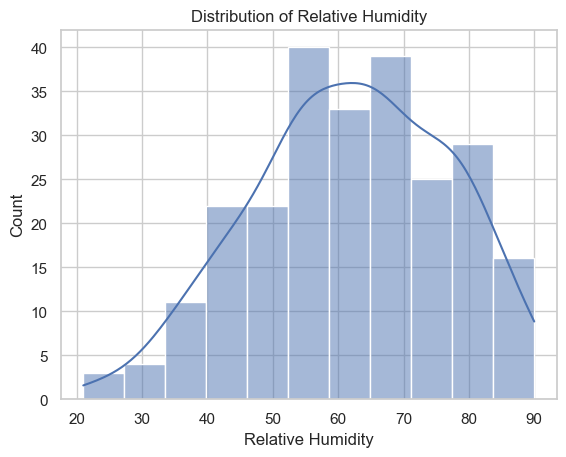

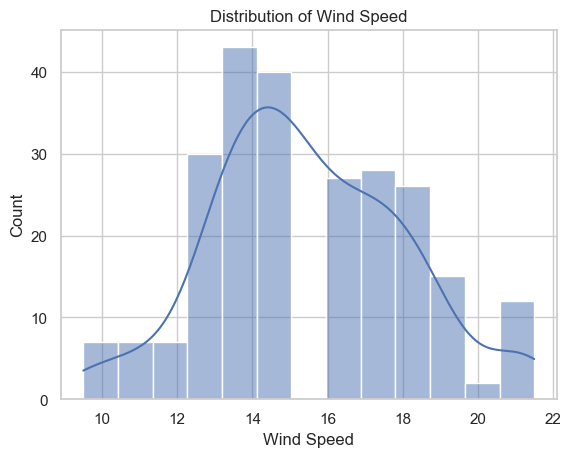

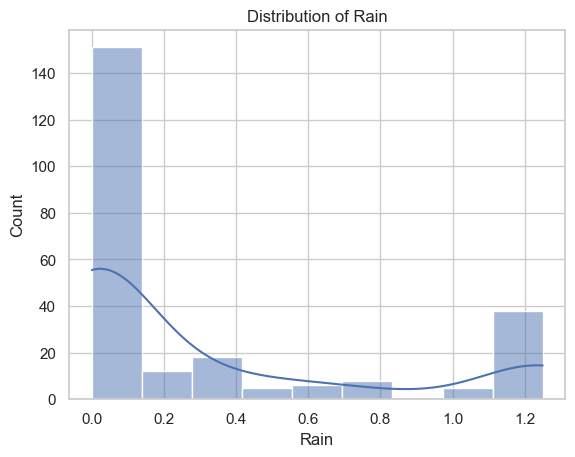

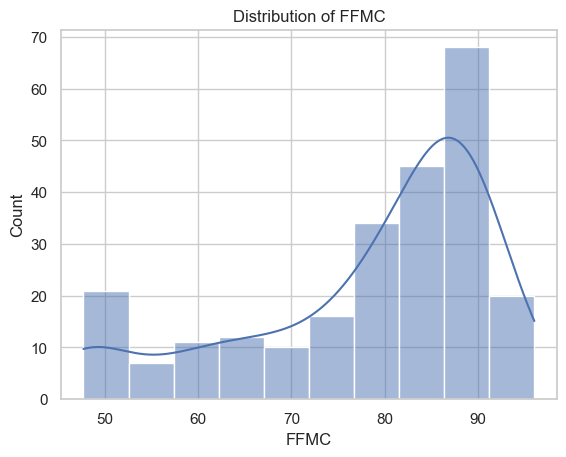

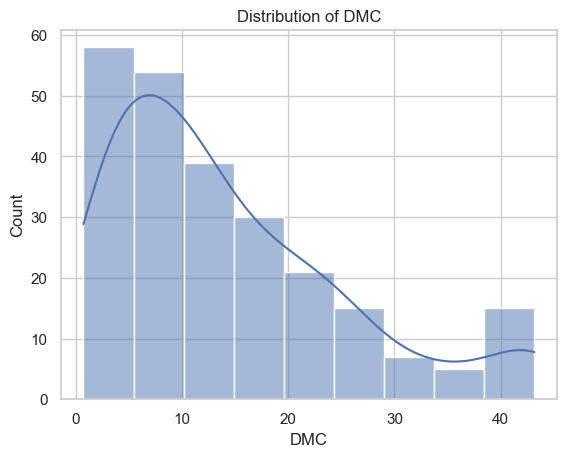

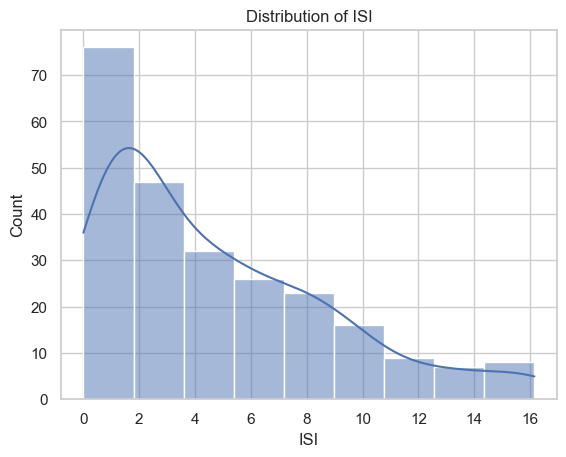

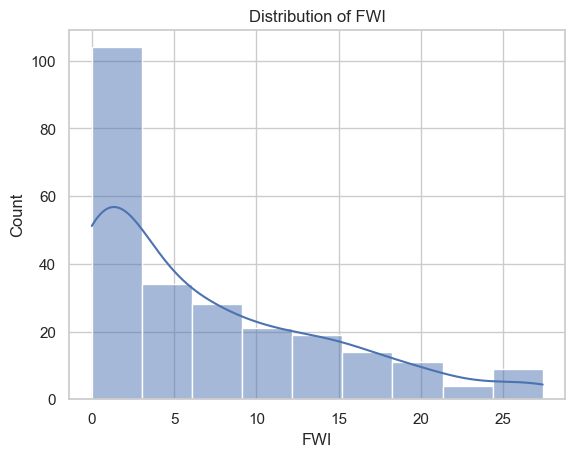

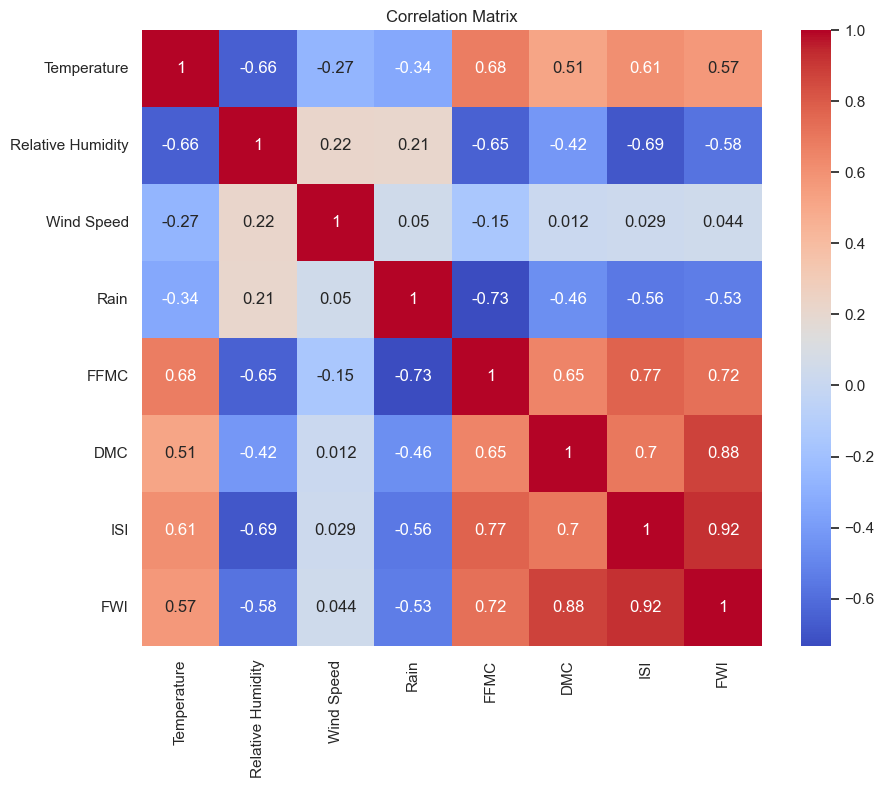

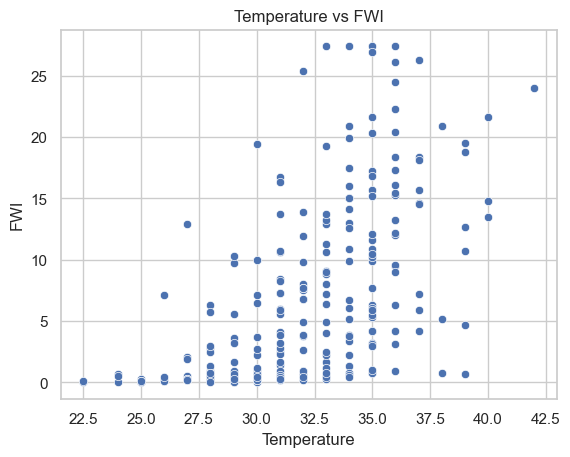

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   day                244 non-null    int64  
 1   month              244 non-null    int64  
 2   year               244 non-null    int64  
 3   Temperature        244 non-null    float64
 4   Relative Humidity  244 non-null    float64
 5   Wind Speed         244 non-null    float64
 6   Rain               244 non-null    float64
 7   FFMC               244 non-null    float64
 8   DMC                244 non-null    float64
 9   DC                 244 non-null    object 
 10  ISI                244 non-null    float64
 11  BUI                244 non-null    float64
 12  FWI                244 non-null    float64
 13  Classes            243 non-null    object 
 14  Region_encoded     244 non-null    int64  
dtypes: float64(9), int64(4), object(2)
memory usage: 28.7+ KB
   day  month  y

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

sns.set(style='whitegrid')
if 'df' not in globals():
    loaded = False
    for fname in ['FWI_Dataset.csv', 'cleaned_FWI_Dataset.csv']:
        try:
            df = pd.read_csv(fname)
            print(f"Loaded dataset from {fname}")
            loaded = True
            break
        except FileNotFoundError:
            continue

    if not loaded:
        print(
            "Warning: dataset files not found. Creating a synthetic sample DataFrame for demonstration. "
            "Please provide 'forestfires.csv' or 'cleaned_forest_fires.csv' to use real data."
        )
        np.random.seed(0)
        n = 200
        df = pd.DataFrame({
            'Temperature': np.random.uniform(5, 35, size=n),
            'Relative Humidity': np.random.uniform(10, 100, size=n),
            'Wind Speed': np.random.uniform(0, 20, size=n),
            'Rain': np.random.uniform(0, 10, size=n),
            'FFMC': np.random.uniform(60, 100, size=n),
            'DMC': np.random.uniform(1, 50, size=n),
            'ISI': np.random.uniform(0, 20, size=n),
            'FWI': np.random.uniform(0, 30, size=n),
            'Region': np.random.choice(['North', 'South', 'East', 'West'], size=n)
        })

print(df.isnull().sum())
df.columns = df.columns.str.strip()
rename_map = {}
if 'RH' in df.columns and 'Relative Humidity' not in df.columns:
    rename_map['RH'] = 'Relative Humidity'
if 'Ws' in df.columns and 'Wind Speed' not in df.columns:
    rename_map['Ws'] = 'Wind Speed'
if rename_map:
    df.rename(columns=rename_map, inplace=True)

numerical_cols = ['Temperature', 'Relative Humidity', 'Wind Speed', 'Rain', 'FFMC', 'DMC', 'ISI', 'FWI']
for col in numerical_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col].astype(str).str.strip(), errors='coerce')
        df[col] = df[col].fillna(df[col].median())

if 'Region' in df.columns and df['Region'].isnull().sum() > 0:
    df['Region'] = df['Region'].fillna(df['Region'].mode()[0])

print(df.isnull().sum())

for col in numerical_cols:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

for col in numerical_cols:
    if col in df.columns:
        plt.figure()
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.show()

plt.figure(figsize=(10, 8))
corr_cols = [c for c in numerical_cols if c in df.columns]
corr_matrix = df[corr_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

if {'Temperature', 'FWI'}.issubset(df.columns):
    plt.figure()
    sns.scatterplot(x='Temperature', y='FWI', data=df)
    plt.title('Temperature vs FWI')
    plt.show()

le = LabelEncoder()
if 'Region' in df.columns:
    df['Region_encoded'] = le.fit_transform(df['Region'])
    df.drop('Region', axis=1, inplace=True)

df.info()
print(df.head())

df.to_csv('cleaned_FWI_Dataset.csv', index=False)


In [7]:
import pandas as pd
import numpy as np

target = 'FWI'

numeric_df = df.apply(pd.to_numeric, errors='coerce')

if target not in numeric_df.columns or numeric_df[target].isnull().all():
    raise ValueError(f"Target column '{target}' is not numeric or contains no valid numeric values.")

correlations = numeric_df.corr()[target].abs().sort_values(ascending=False)
print(correlations)

top_features = correlations.index[1:6]
print(list(top_features))

X = numeric_df[top_features]
y = numeric_df[target]

scaler_params = {}
X_scaled = X.copy()

for col in X.columns:
    mean_val = X[col].mean()
    std_val = X[col].std()
    if std_val == 0 or np.isnan(std_val):
        std_val = 1.0
    scaler_params[col] = {'mean': mean_val, 'std': std_val}
    X_scaled[col] = (X[col] - mean_val) / std_val

print(scaler_params)

test_size = 0.2
n_samples = len(X_scaled)
n_test = int(n_samples * test_size)

indices = np.arange(n_samples)
np.random.shuffle(indices)

test_indices = indices[:n_test]
train_indices = indices[n_test:]

X_train = X_scaled.iloc[train_indices]
X_test = X_scaled.iloc[test_indices]
y_train = y.iloc[train_indices]
y_test = y.iloc[test_indices]

print(len(X_train), len(X_test))

import pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler_params, f)

X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

FWI                  1.000000
ISI                  0.922941
DMC                  0.877739
BUI                  0.855623
DC                   0.739009
FFMC                 0.722423
Relative Humidity    0.575836
Temperature          0.570230
Rain                 0.533121
day                  0.350713
Region_encoded       0.195407
month                0.083244
Wind Speed           0.044176
year                      NaN
Classes                   NaN
Name: FWI, dtype: float64
['ISI', 'DMC', 'BUI', 'DC', 'FFMC']
{'ISI': {'mean': np.float64(4.74672131147541), 'std': np.float64(4.0919057796664156)}, 'DMC': {'mean': np.float64(14.286065573770491), 'std': np.float64(11.194393460586191)}, 'BUI': {'mean': np.float64(16.664754098360657), 'std': np.float64(14.204823977055081)}, 'DC': {'mean': np.float64(49.430864197530866), 'std': np.float64(47.66560598458993)}, 'FFMC': {'mean': np.float64(78.28811475409836), 'std': np.float64(13.283492963829604)}}
196 48


In [8]:
import numpy as np
import pickle

#  Evaluation Metrics 
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

#  Manual Ridge Regression 
class ManualRidge:
    def __init__(self, alpha):
        self.alpha = alpha

    def fit(self, X, y):
        ones = np.ones((X.shape[0], 1))
        X_b = np.hstack((ones, X))
        I = np.eye(X_b.shape[1])
        I[0, 0] = 0
        weights = np.linalg.pinv(X_b.T @ X_b + self.alpha * I) @ X_b.T @ y
        self.intercept_ = weights[0]
        self.coef_ = weights[1:]

    def predict(self, X):
        return X @ self.coef_ + self.intercept_

#  CLEAN NaN VALUES 
train_mask = ~np.isnan(X_train).any(axis=1) & ~np.isnan(y_train)
test_mask = ~np.isnan(X_test).any(axis=1) & ~np.isnan(y_test)

X_train_clean = X_train[train_mask].values
y_train_clean = y_train[train_mask].values
X_test_clean = X_test[test_mask].values
y_test_clean = y_test[test_mask].values

#  Alpha Tuning 
alphas = [0.01, 0.1, 1, 10, 100]
best_alpha = alphas[0]
best_error = float('inf')

for alpha in alphas:
    model = ManualRidge(alpha)
    model.fit(X_train_clean, y_train_clean)
    preds = model.predict(X_test_clean)
    error = mse(y_test_clean, preds)

    if error < best_error:
        best_error = error
        best_alpha = alpha

#  Final Model 
final_model = ManualRidge(best_alpha)
final_model.fit(X_train_clean, y_train_clean)

train_preds = final_model.predict(X_train_clean)
test_preds = final_model.predict(X_test_clean)

print("Best Alpha:", best_alpha)
print("Training MSE:", mse(y_train_clean, train_preds))
print("Training R2:", r2_score(y_train_clean, train_preds))
print("Testing MSE:", mse(y_test_clean, test_preds))
print("Testing R2:", r2_score(y_test_clean, test_preds))

# Save Model 
model_data = {
    "coef_": final_model.coef_,
    "intercept_": final_model.intercept_,
    "alpha": best_alpha
}

with open("ridge.pkl", "wb") as f:
    pickle.dump(model_data, f)

print("Model saved as ridge.pkl")


Best Alpha: 0.01
Training MSE: 1.0325940017064366
Training R2: 0.9804852560048974
Testing MSE: 0.9034205633088401
Testing R2: 0.9826235601751347
Model saved as ridge.pkl
